## Introduction
Charissa Janto

Batch 09

## Importing Library

In [32]:
import pandas as pd
import numpy as np
import scipy as stats
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading

In [33]:
df =  pd.read_csv('/Users/charissa.janto/Desktop/Hactiv8/GitHub/Milestone 1/supermarket_sales - Sheet.csv')
print(df)

df.head()

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
df.shape

(1000, 17)

## Data Cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Data Exploration

<AxesSubplot:>

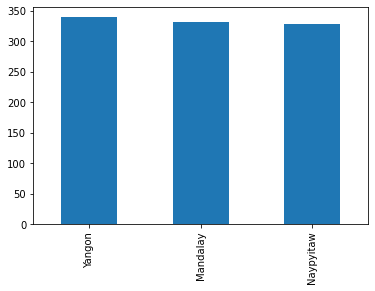

In [36]:
#Check all cities distributions
df['City'].value_counts().plot(kind='bar')

Find which city is most active
By looking at the data, we know that:
- Yangon is branch A
- Mandalay is branch B
- Naypyitaw is branch C.

From the search above we know that Yangon is the most active branch.

In [37]:
# Find Sum Gross Income from different Cities
City_Gross_Income = df[['City','gross income']].groupby('City').sum()
City_Gross_Income.sort_values(by='gross income', ascending=False,)

,gross income
City,
Naypyitaw,5265.1765
Yangon,5057.1605
Mandalay,5057.0320


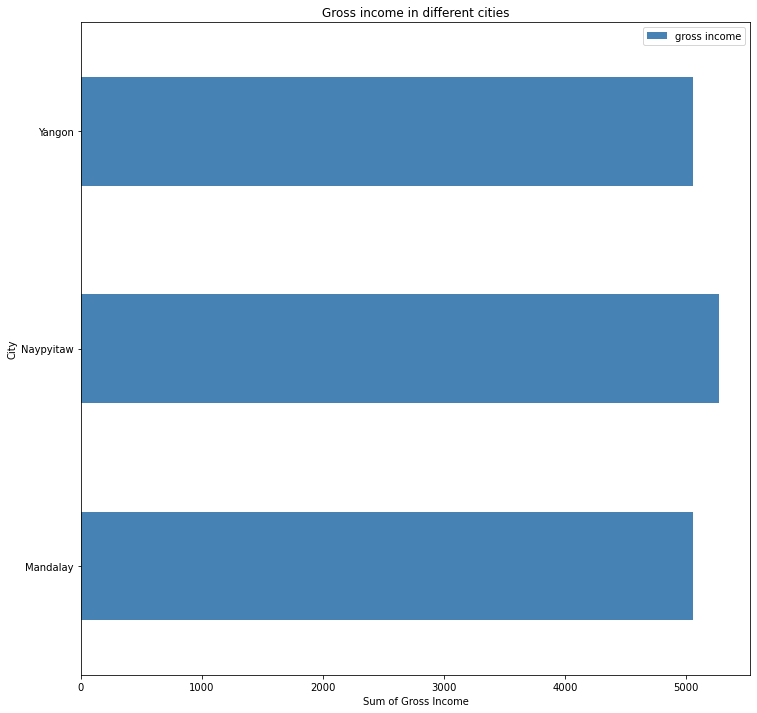

In [38]:
# Plot Sum Gross Income from different Cities
City_Gross_Income.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Sum of Gross Income')
plt.title('Gross income in different cities')
plt.show()

Despite that Yangon is the most active branch, Naypyitaw is the most profitable.

<AxesSubplot:>

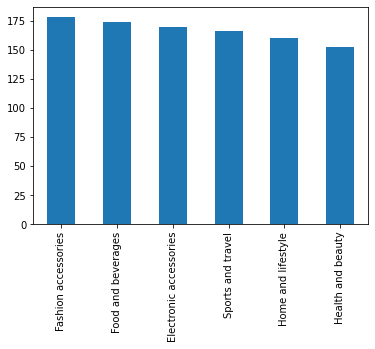

In [39]:
#Check Product lines distributions
df['Product line'].value_counts().plot(kind='bar')

We can tell that Fashion accessory is the most purchased among other categories.

In [40]:
#Find the sum of gross profit from each product line
Product_Line_Gross_Income = df[['Product line','gross income']].groupby('Product line').sum()
Product_Line_Gross_Income.sort_values(by='gross income', ascending=False,)

,gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


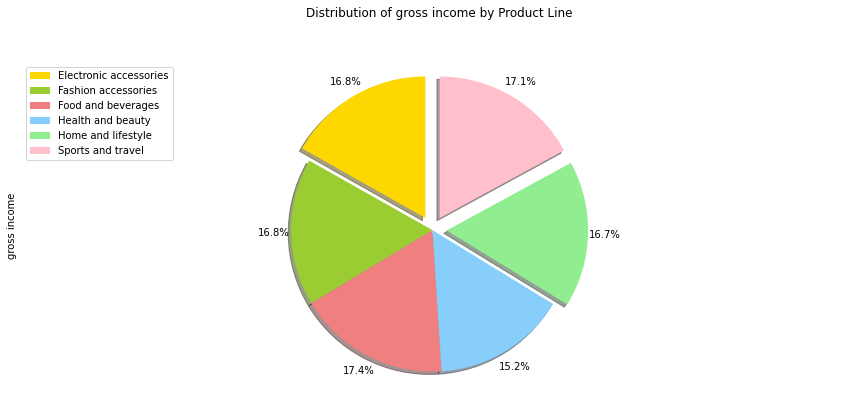

In [41]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

Product_Line_Gross_Income['gross income'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Distribution of gross income by Product Line', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=Product_Line_Gross_Income.index, loc='upper left') 

plt.show()

In [42]:
#Check Ratings distributions
df['Rating'].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [43]:
#Check Product lines distributions >< Rating
Product_Line_Rating = df[['Product line','Rating']].groupby('Product line').mean()
Product_Line_Rating.sort_values(by='Rating', ascending=False,)

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


<AxesSubplot:xlabel='Rating', ylabel='Product line'>

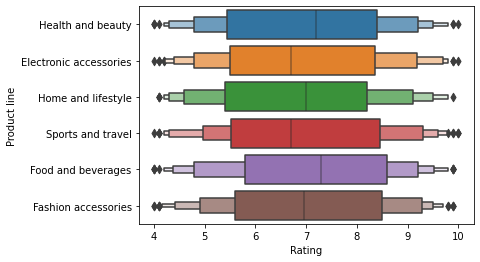

In [44]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )

<AxesSubplot:>

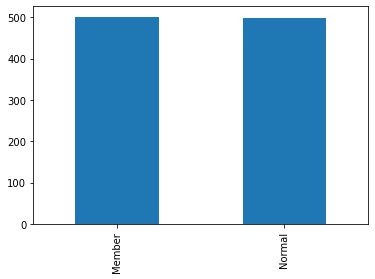

In [45]:
#Check membership of customer
df['Customer type'].value_counts().plot(kind='bar')

There are about the same amount of member and normal cutomers

In [46]:
# Break date to Day, Month, Year
df['date'] = pd.to_datetime(df['Date'])
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year

In [47]:
df['year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: year, Length: 1000, dtype: int64

In [48]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


In [49]:
# Check for Product line that brings the most average Gross Income
Product_Line_Gross_Income = df[['Product line','gross income']].groupby('Product line').mean()
Product_Line_Gross_Income.sort_values(by='gross income', ascending=False,)

,gross income
Product line,
Home and lifestyle,16.030331
Sports and travel,15.812630
Health and beauty,15.411572
Food and beverages,15.365310
Electronic accessories,15.220597
Fashion accessories,14.528062


## Two Sample TTest - Hypothesis Testing

We found that most funded the most successful (biggest average gross profit) is coming from Home and lifestyle and the least successful (lowest average gross profit) is coming from Sports and travel. Let's check how both categories compared.

In [50]:
# Query data of Gross income in Product line = Home and lifestyle
Home_and_lifestyle = df[df['Product line'] == ('Home and lifestyle')]
Home_and_lifestyle_gross_income = Home_and_lifestyle['gross income']
Home_and_lifestyle_gross_income

2      16.2155
7      36.7800
19      4.0300
22      3.3200
25     21.0360
        ...   
967    12.1515
971    12.9185
973    12.0120
996    48.6900
998     3.2910
Name: gross income, Length: 160, dtype: float64

In [51]:
# Query data of usd_pledged_real in category = Tabletop Games
Fashion_accessories= df[df['Product line'] == ('Fashion accessories')]
Fashion_accessories_gross_income = Fashion_accessories['gross income']
Fashion_accessories_gross_income

10      2.8960
26      1.6760
27      8.7670
30     23.5325
49     41.3150
        ...   
974     8.6130
975     4.9920
985    15.9275
993     8.7450
999    30.9190
Name: gross income, Length: 178, dtype: float64

### The Hypothesis is:

- Null Hypothesis (H0):μHome and lifestyle = μSports and travel

(Average gross income of Home and lifestyle is **not significantly different** from the average gross income of Sports and travel)


- Alternative Hypothesis (H1): μHome and lifestyle != μSports and travel

(Average gross income of Home and lifestyle is **significantly different** from the average gross income of Sports and travel)

In [52]:
# Finding P-value and t-statistics of the hypothesis
t_stat, p_val = stats.ttest_ind(Home_and_lifestyle_gross_income,Fashion_accessories_gross_income)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.24536702490471674
t-statistics: 1.1637105609383325


When we run the two indipendent samples with a threshold of 0.05, we got this as the result:

P-value: 0.5018922633919138

t-statistics: 0.672211969325253

/Users/charissa.janto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charissa.janto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


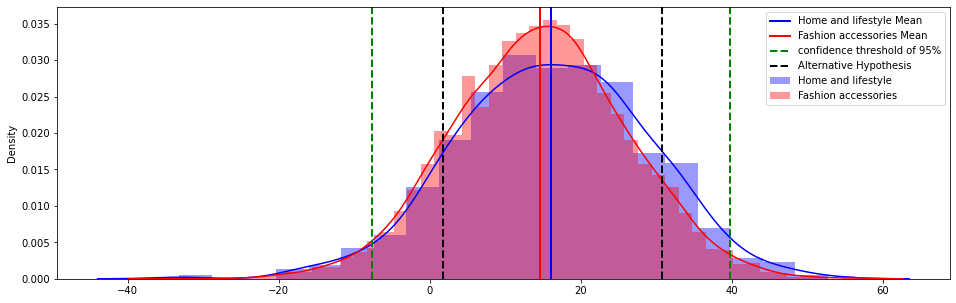

In [54]:
# Create samples of old and new page
Home_and_lifestyle_pop = np.random.normal(Home_and_lifestyle_gross_income.mean(),Home_and_lifestyle_gross_income.std(),500)
Fashion_accessories_pop = np.random.normal(Fashion_accessories_gross_income.mean(),Fashion_accessories_gross_income.std(),5000)

# Ploting the graph below
# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, Home_and_lifestyle_gross_income.mean(), Home_and_lifestyle_gross_income.std())
plt.figure(figsize=(16,5))
sns.distplot(Home_and_lifestyle_pop, label='Home and lifestyle',color='blue')
sns.distplot(Fashion_accessories_pop, label='Fashion accessories',color='red')


plt.axvline(Home_and_lifestyle_gross_income.mean(), color='blue', linewidth=2, label='Home and lifestyle Mean')
plt.axvline(Fashion_accessories_gross_income.mean(), color='red',  linewidth=2, label='Fashion accessories Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Home_and_lifestyle_pop.mean()+t_stat*Home_and_lifestyle_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Home_and_lifestyle_pop.mean()-t_stat*Home_and_lifestyle_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

### Conclusion of hypothesis
Based on the hypothesis test, we can conclude that the H0 is accepted. The Average gross income of Home and lifestyle is **not significantly different** from the average gross income of Sports and travel.